In [22]:
# 1. Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [23]:
# 2. Load dataset
data = pd.read_csv(r'C:\Users\EMIL MATHEW\OneDrive\Desktop\ict\dataset\car_age_price.csv')
print(data.head())
print(data.shape)


   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000
(112, 2)


In [24]:
# 3. Check for missing values
print(data.isna().sum())

Year     0
Price    0
dtype: int64


In [25]:
# 4. Features and Target
X = data[['Year']]   # independent variable
y = data['Price']    # dependent variable

In [26]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# -------------------------
# 6. Linear Regression
# -------------------------
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nLinear Regression Results:")
print("Mean Squared Error =", mean_squared_error(y_test, y_pred_lr))
print("R² Score =", r2_score(y_test, y_pred_lr))



Linear Regression Results:
Mean Squared Error = 4326906256.829671
R² Score = 0.36759313425902185


In [28]:
# -------------------------
# 7. Lasso Regression
# -------------------------
lasso = Lasso(alpha=0.1)  # alpha can be tuned
lasso_model = lasso.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression Results:")
print("Mean Squared Error =", mean_squared_error(y_test, y_pred_lasso))
print("R² Score =", r2_score(y_test, y_pred_lasso))



Lasso Regression Results:
Mean Squared Error = 4326901608.19506
R² Score = 0.36759381368868127


In [29]:
# -------------------------
# 8. Prediction for 2022 model
# -------------------------
year_2022 = np.array([[2022]])
price_lr_2022 = lr_model.predict(year_2022)[0]
price_lasso_2022 = lasso_model.predict(year_2022)[0]

print("\nPredicted Price for 2022 model (Linear Regression):", price_lr_2022)
print("Predicted Price for 2022 model (Lasso Regression):", price_lasso_2022)


Predicted Price for 2022 model (Linear Regression): 743601.6159450412
Predicted Price for 2022 model (Lasso Regression): 743601.3917776793


C:\Users\EMIL MATHEW\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\EMIL MATHEW\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


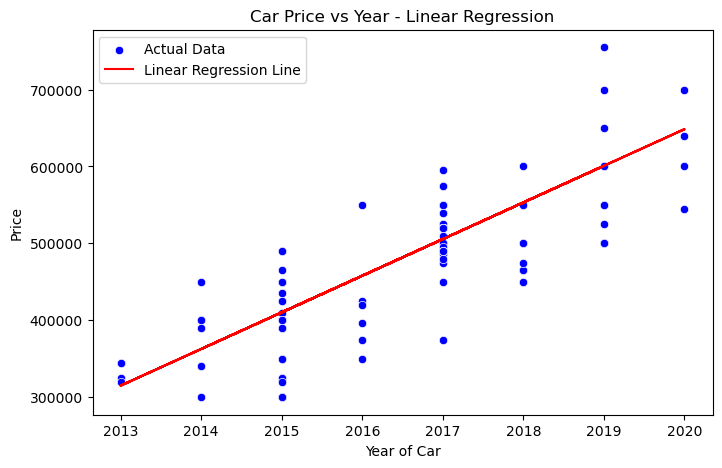

In [30]:
# -------------------------
# 9. Visualization
# -------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x='Year', y='Price', data=data, color='blue', label='Actual Data')
plt.plot(data['Year'], lr_model.predict(data[['Year']]), color='red', label='Linear Regression Line')
plt.xlabel("Year of Car")
plt.ylabel("Price")
plt.title("Car Price vs Year - Linear Regression")
plt.legend()
plt.show()
